Task 2 : Prediction using unsupervised ML

Done by: Firas Elloumi

In [19]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

importing Dataset

In [20]:
iris = pd.read_csv('C:/Users/firas/Downloads/Iris.csv')
iris.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
#checking unique values in the column 'species'
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
#making id column as index
iris.set_index(['Id'], inplace=True)
iris.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
#checking the Nullvalues
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [23]:
#Droping the species column
iris.drop(['Species'],axis=1,inplace=True)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


Checking the correlation between columns by using Heatmap

Text(0.5, 1.0, "Heatmap of 'Iris_dataset '")

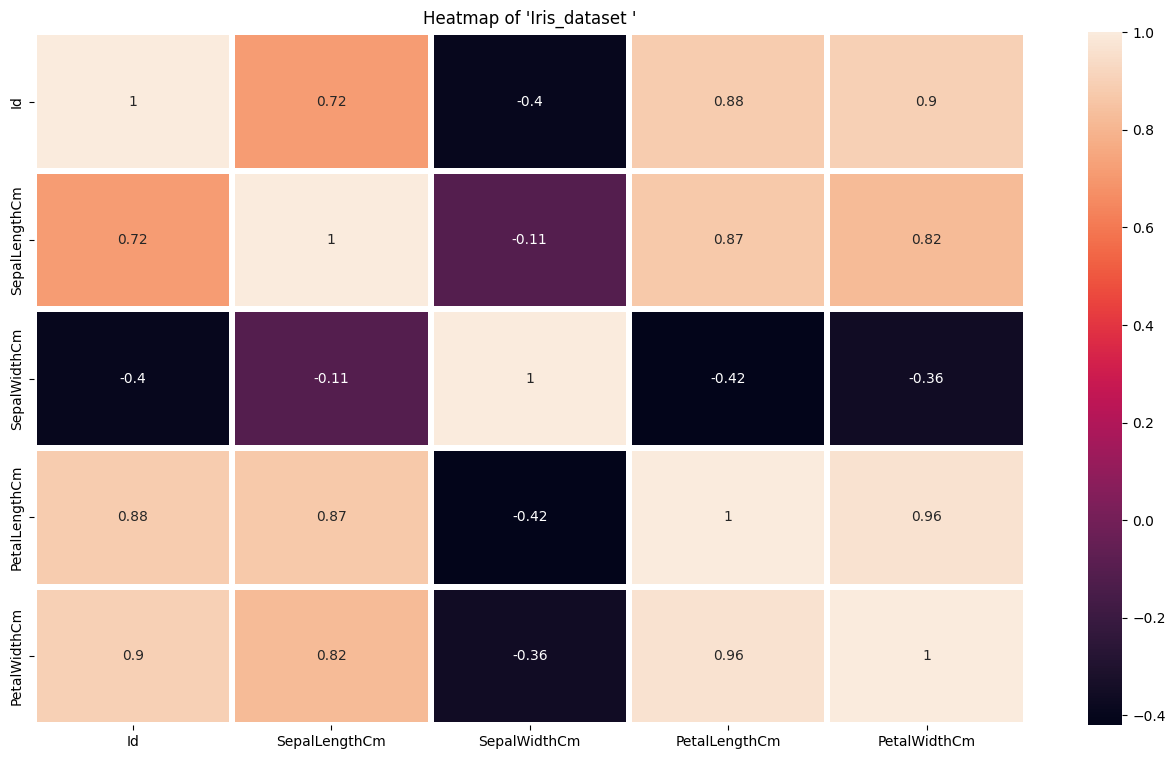

In [24]:
plt.figure(figsize=(16,9))
ax=sns.heatmap(iris.corr(),annot=True,linewidth=3)
plt.title("Heatmap of 'Iris_dataset '")

Drawing pairplot for better visualization of data distribution

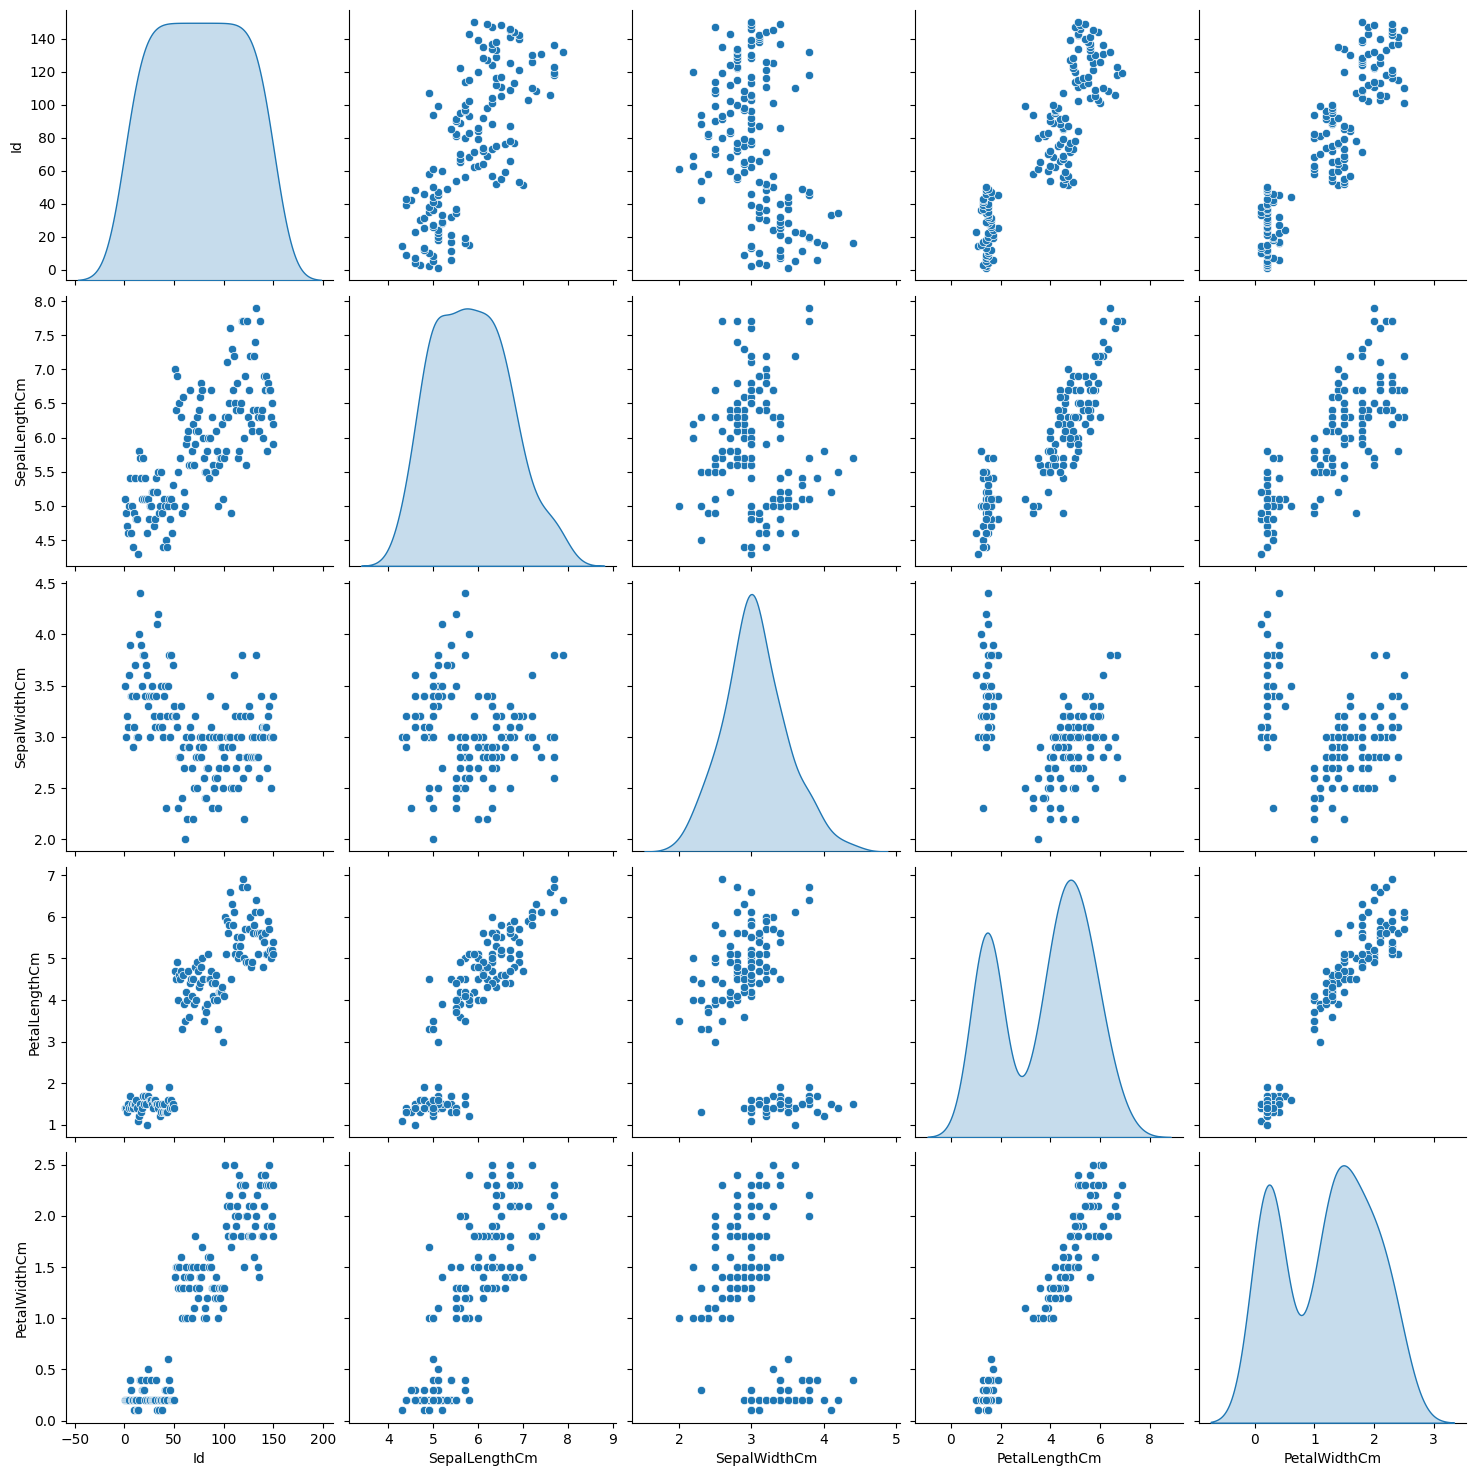

In [25]:
sns.pairplot(iris,diag_kind='kde', height=3)

In [26]:
#preparing the data
x=iris.iloc[:,[0,1,2,3]].values
sse=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

Finding value of 'k' by using elbow method

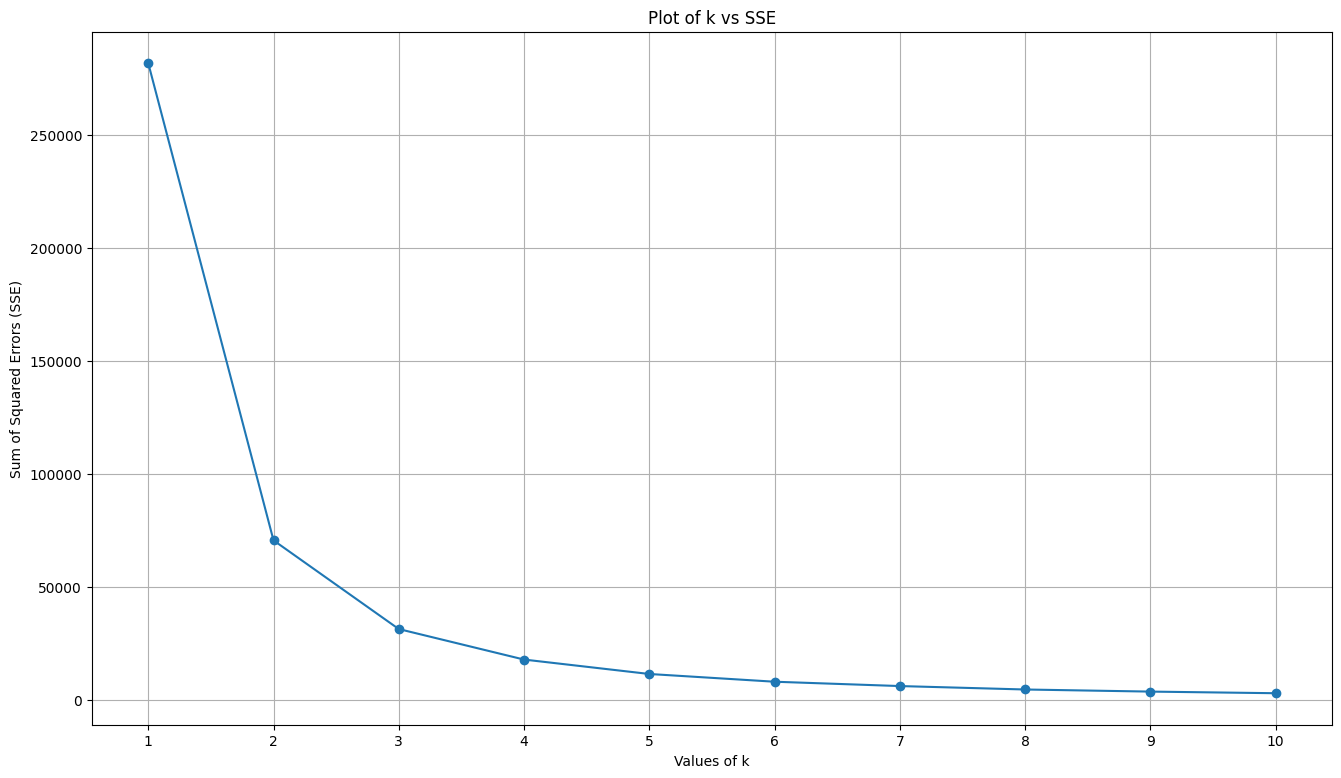

In [30]:
plt.figure(figsize=(16, 9))
plt.plot(range(1, 11), sse, marker='o')  # Add markers for better visualization
plt.title('Plot of k vs SSE')
plt.xlabel("Values of k")  # Corrected typo
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)  # Add grid lines for better readability
plt.xticks(range(1, 11))  # Set x-axis ticks to match the range
plt.show()

interpretation : it is clear from above elbow-plot that value of 'k' is 3

In [31]:
# Applying KMeans to the dataset
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=21)

# Making predictions
y_kmeans = kmeans.fit_predict(x)


In [32]:
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

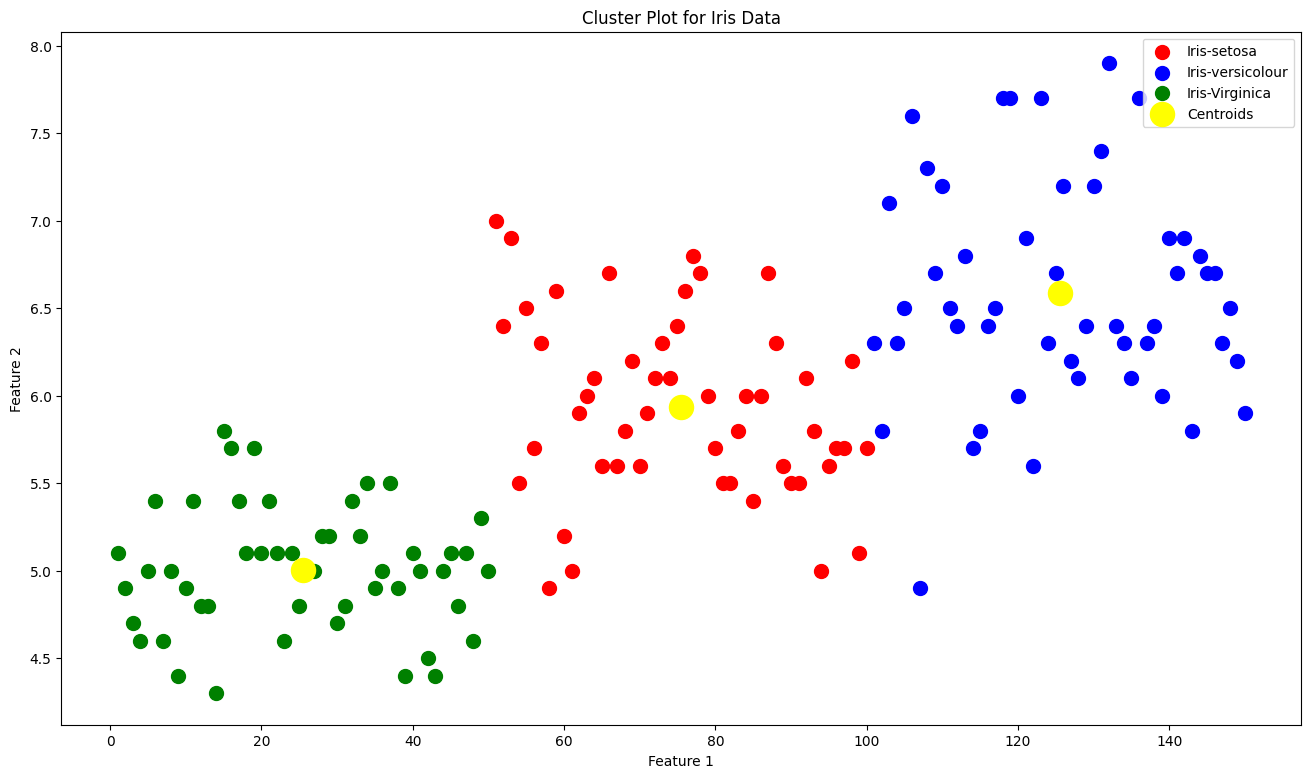

In [33]:
#Scatter plot for first two columns of the data 
plt.figure(figsize=(16, 9))

plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=100, c='red', label='Iris-setosa')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=100, c='blue', label='Iris-versicolour')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=100, c='green', label='Iris-Virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

plt.title('Cluster Plot for Iris Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Scatter plot for last two columns

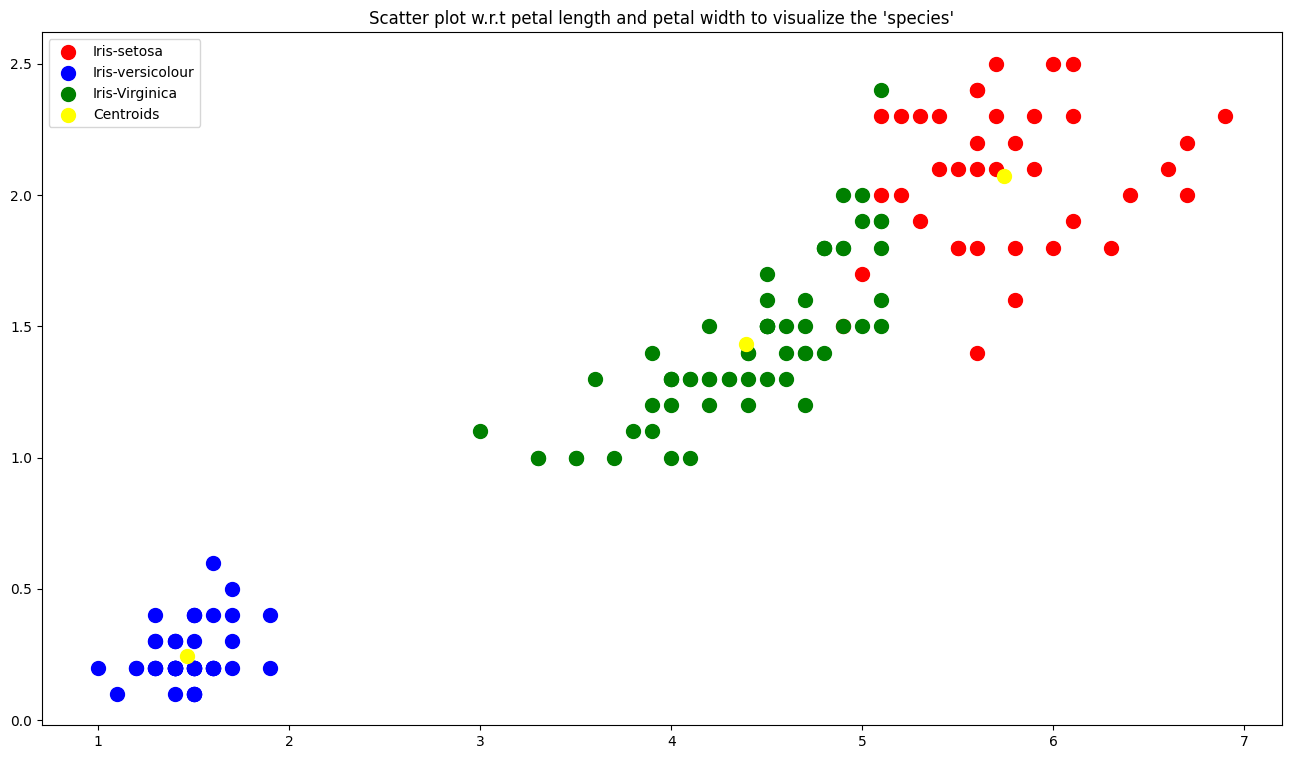

In [18]:
plt.figure(figsize=(16, 9))

# Plotting the scatter plot for different clusters
plt.scatter(x[y_kmeans==0, 2], x[y_kmeans==0, 3], s=100, c='red', label='Iris-setosa')
plt.scatter(x[y_kmeans==1, 2], x[y_kmeans==1, 3], s=100, c='blue', label='Iris-versicolour')
plt.scatter(x[y_kmeans==2, 2], x[y_kmeans==2, 3], s=100, c='green', label='Iris-Virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=100, c='yellow', label='Centroids')

# Adding title and legend
plt.title("Scatter plot w.r.t petal length and petal width to visualize the 'species'")
plt.legend()
